In [27]:

import pandas as pd
from tqdm import tqdm
import os
import matplotlib.pyplot as plt



In [28]:
from matplotlib.pyplot import axis
from sympy import rotations
import seaborn as sns
import matplotlib.dates as mdates
plt.rc('axes', labelsize=25) #fontsize of the x and y labels
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels
plt.rc('legend', fontsize=19) #fontsize of the legend

def plot_time_series (daily_comments,daily_posts,daily_users,title):
    fig, axs = plt.subplots(3, 1, figsize=(9, 12),tight_layout=True,sharex=True)
    axs[0].tick_params(axis='x', rotation=45)
    axs[1].tick_params(axis='x', rotation=45)
    axs[2].tick_params(axis='x', rotation=45)
    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    axs[2].xaxis.set_major_locator(mdates.MonthLocator(interval=3))


    #first the percentage
    axs[0].grid(True)
    #pd.concat([grouped_all_sentiment['rolling_average_second'],grouped_all_sentiment['rolling_average']], axis=0)
    sns.lineplot(data=(daily_comments['id']).rolling(window=14).mean(),  color = '#E69F00',ci=95,err_style="band",linewidth=3,ax=axs[0])
    sns.lineplot(data=(daily_posts['id']).rolling(window=14).mean(),  color = '#56B4E9',ci=95,err_style="band",linewidth=3,ax=axs[1])
    axs[0].set_ylabel('# of daily comments ')
    axs[1].set_ylabel('# of daily posts')
    #axs[0].set_yscale('log')
    axs[0].set_xlabel('')
    axs[1].set_xlabel('')
    axs[1].grid(True)
    #axs[0].legend()
    #axs[1].legend(loc = "upper center")

    axs[2].grid(True)
    sns.lineplot(data=daily_users.rolling(window=14).mean(),  color = '#D55E00',ci=95,err_style="band",linewidth=3,ax=axs[2])
    axs[2].set_ylabel('# of daily active users')
    axs[2].set_xlabel('')
    

    fig.suptitle(title,fontsize = 20)
    plt.savefig(f"pdf/italy_descriptive.pdf", format="pdf", bbox_inches="tight")

In [29]:

comments = pd.read_json('dump_extractor/PushshiftDumps/scripts/italy_comments_2022-23.json')


In [30]:
comments_italy = comments[comments['created_utc']<1672531200]

In [31]:
posts_italy = pd.read_json('DATASETS/ITALY_ITALIA_ALL_ACTIVITY/POSTS/italy_posts_22_23.json')
posts_italy = posts_italy[posts_italy['created_utc']< 1672531200000]
posts_italy = posts_italy[posts_italy['created_utc']>1643624743000]

In [32]:
posts_italy['created_utc'].head()

1860    1643627250000
1861    1643628834000
1862    1643629969000
1863    1643630237000
1864    1643630766000
Name: created_utc, dtype: int64

In [33]:
import datetime


comments_italy['created_utc'] = pd.to_datetime(comments_italy['created_utc'], unit='s')

#filter 

#groupby
daily_comments_i = comments_italy.groupby(comments_italy['created_utc'].dt.date).count()

daily_users_i = comments_italy[['created_utc','author']].groupby(comments_italy['created_utc'].dt.date).author.nunique()

/tmp/ipykernel_22181/2380864917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_italy['created_utc'] = pd.to_datetime(comments_italy['created_utc'], unit='s')


In [34]:
posts_italy['created_utc'] = pd.to_datetime(posts_italy['created_utc'], unit='ms')
daily_posts_i = posts_italy.groupby(posts_italy['created_utc'].dt.date).count()
#daily_posts_i = daily_posts_i[daily_posts_i['created_utc'] >1643624743]

In [35]:
#plot_time_series(daily_comments_i,daily_posts_i,daily_users_i,'r/italy')

In [36]:
#asd

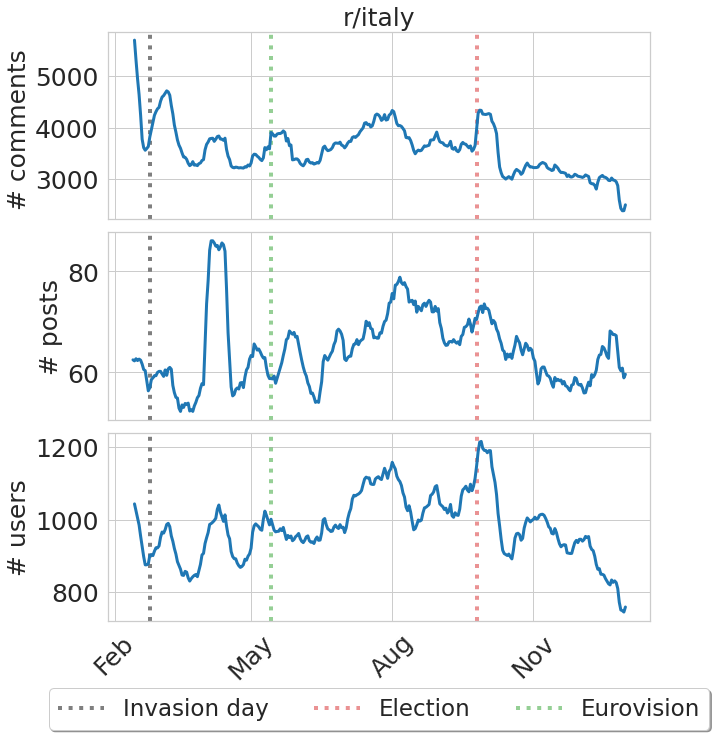

In [112]:
# plot_time_series(daily_comments,daily_posts,daily_users,'r/france')
import datetime as dt
title = "r/italy"

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
axs[2].tick_params(axis='x', rotation=45)
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[2].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.rc('legend', fontsize=23) #fontsize of the legend

for i in range(3):
    axs[i].axvline(x = dt.datetime(2022, 2, 24), color = 'black', label="Invasion day",
                   linestyle = ":", linewidth = 4,alpha = 0.5)
    #axs[i].axvline(x = dt.datetime(2022, 4, 10), color = 'tab:red', linestyle = ":", linewidth = 4,alpha = 0.5)
    axs[i].axvline(x = dt.datetime(2022, 9, 25), color = 'tab:red', label = "Election", linestyle = ":", linewidth = 4,alpha = 0.5)
    axs[i].axvline(x = dt.datetime(2022, 5, 14), color = 'tab:green',label = "Eurovision", linestyle = ":", linewidth = 4,alpha = 0.5)

#first the percentage
axs[0].grid(True)
#pd.concat([grouped_all_sentiment['rolling_average_second'],grouped_all_sentiment['rolling_average']], axis=0)
sns.lineplot(data=(daily_comments_i['id']).rolling(window=14).mean(),  color = 'tab:blue',ci=95,err_style="band",linewidth=3,ax=axs[0])
sns.lineplot(data=(daily_posts_i['id']).rolling(window=14).mean(),  color = 'tab:blue',ci=95,err_style="band",linewidth=3,ax=axs[1])
axs[0].set_ylabel('# comments ')
axs[1].set_ylabel('# posts')
#axs[0].set_yscale('log')
axs[0].set_xlabel('')
axs[1].set_xlabel('')
axs[1].grid(True)
#axs[1].legend(loc = "upper center")

axs[2].grid(True)
sns.lineplot(data=daily_users_i.rolling(window=14).mean(),  color = 'tab:blue',ci=95,err_style="band",linewidth=3,ax=axs[2])
axs[2].set_ylabel('# users')
axs[2].set_xlabel('')

axs[0].get_legend().remove()
axs[1].get_legend().remove()


ax = axs[2]
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=3)

axs[0].set_title(title,fontsize = 25)
plt.tight_layout()


In [40]:
with open("DATASETS/WAR_ALL_COMMENTS/refined_ids_war_comments.txt", "r") as stopwords:
	ids_war = stopwords.read().split('\n')
stopwords.close()

In [41]:
comments_italy['is_war'] = comments_italy['id'].isin(ids_war)

/tmp/ipykernel_22181/4232887212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_italy['is_war'] = comments_italy['id'].isin(ids_war)


### removed 

In [42]:
grouped_all_ = comments_italy.groupby(comments_italy['created_utc'].dt.date).count()
grouped_war_ = comments_italy[comments_italy['is_war']==True].groupby(comments_italy['created_utc'].dt.date).count()
#we compute the percentage of daily war comments in r/france
grouped_all_['percentage'] = grouped_war_['created_utc']/grouped_all_['created_utc']
#fill nan with 0
grouped_all_['percentage'] = grouped_all_['percentage'].fillna(0)

grouped_all_removed = comments_italy[comments_italy['body']=='[removed]'].groupby(comments_italy['created_utc'].dt.date).count()
#we compute the percentage of daily removed comments in r/france
grouped_all_removed['percentage'] = grouped_all_removed['created_utc']/grouped_all_['created_utc']
#fill nan with 0
grouped_all_removed['percentage'] = grouped_all_removed['percentage'].fillna(0)



### sentiment

In [43]:
#first we load the new sentiment indexes
#first we load the sentiment indexes
import numpy as np
import pandas as pd

sentences = pd.read_json('DATASETS/ITALY_ITALIA_ALL_ACTIVITY/refined_sentences_italy_italia_emotion_with_emotion_sentiment_sub_is_war.json')
#1 - Loading all the arrays 
n_sentiment = np.load('DATASETS/ITALY_ITALIA_ALL_ACTIVITY/SENTIMENT/NEW_SENTIMENT/negative_sentiment_0.npy')
p_sentiment = np.load('DATASETS/ITALY_ITALIA_ALL_ACTIVITY/SENTIMENT/NEW_SENTIMENT/positive_sentiment_0.npy')

for i in range(1,80,1):
    a = np.load('DATASETS/ITALY_ITALIA_ALL_ACTIVITY/SENTIMENT/NEW_SENTIMENT/negative_sentiment_'+str(i)+'.npy')
    b = np.load('DATASETS/ITALY_ITALIA_ALL_ACTIVITY/SENTIMENT/NEW_SENTIMENT/positive_sentiment_'+str(i)+'.npy')
    n_sentiment = np.concatenate((n_sentiment,a),axis=0)
    p_sentiment = np.concatenate((p_sentiment,b),axis=0)
#make a dataframe
sentences['negative_sentiment'] = n_sentiment
sentences['positive_sentiment'] = p_sentiment
sentences['sentiment'] = sentences['positive_sentiment'] - sentences['negative_sentiment']
#then we merge the values on single comments by averaging it
sentences_new_grouped = sentences.groupby(sentences['id_origin']).mean(numeric_only=True) 

In [44]:
comments_sentiment = pd.merge(left=comments_italy,right=sentences_new_grouped,left_on='id',right_on='id_origin',how='inner')
#average daily
comments_sentiment['created_utc_x'] = pd.to_datetime(comments_sentiment['created_utc_x'],unit='ms')
grouped_all_sentiment = comments_sentiment.groupby(comments_sentiment['created_utc_x'].dt.date).mean(numeric_only=True)

Text(0.5, 0.98, 'r/italy')

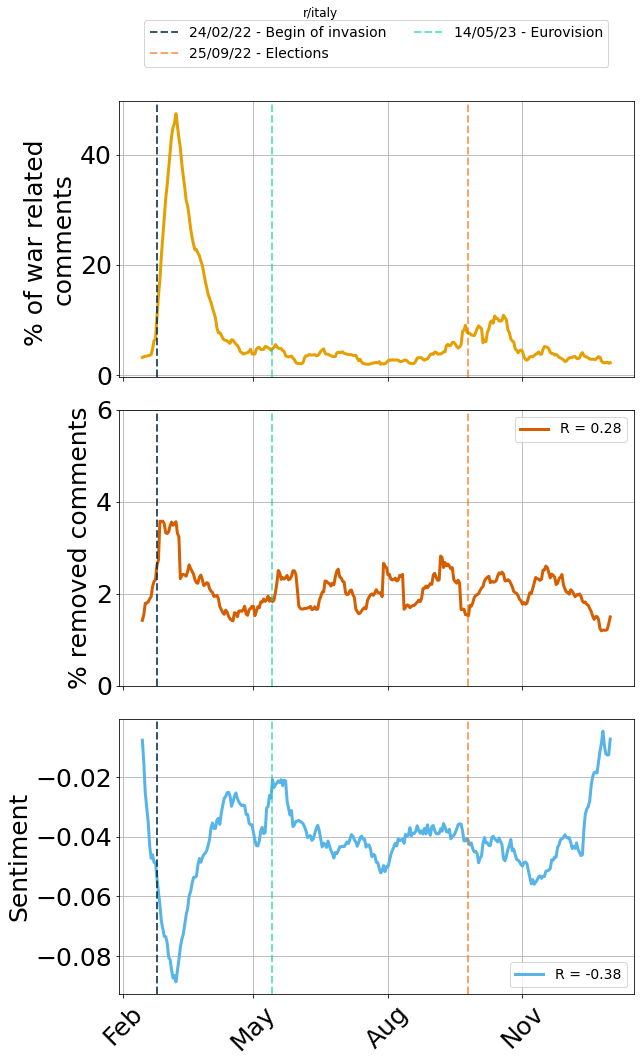

In [45]:
#split the plots of the time series

import datetime as dt

from matplotlib.pyplot import axis
from sympy import rotations
fig, axs = plt.subplots(3, 1, figsize=(9, 15),tight_layout=True,sharex = True)
axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)
axs[2].tick_params(axis='x', rotation=45)
axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)
axs[2].tick_params(axis='x', rotation=45)
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axs[2].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axs[1].set_ylim(0,6)
plt.rc('legend', fontsize=14) #fontsize of the legend


#first the percentage
axs[0].grid(True)
#pd.concat([grouped_all_sentiment['rolling_average_second'],grouped_all_sentiment['rolling_average']], axis=0)
#axs[0].plot(grouped_all_['percentage']*100,color='#E69F00',marker='o',markersize=2,linestyle = 'none',alpha=0.4)
sns.lineplot(data=(grouped_all_['percentage']*100).rolling(window=14).mean(),  color = '#E69F00',ci=95,err_style="band",linewidth=3,ax=axs[0])
axs[0].set_xlabel('')
axs[0].set_ylabel('% of war related \ncomments')

#then the sentiment
axs[2].grid(True)
#axs[2].plot(grouped_all_sentiment['sentiment'],color='#56B4E9',marker='o', markersize=2,linestyle = 'none',alpha=0.4)
sns.lineplot(data=(grouped_all_sentiment['sentiment']).rolling(window=14).mean(),  color = '#56B4E9',ci=95,err_style="band",linewidth=3,ax=axs[2],label='R = -0.38')
axs[2].set_ylabel('Sentiment')
axs[2].set_xlabel('')

#then the removed percentage
axs[1].grid(True)
#axs[1].plot(grouped_all_removed['percentage']*100,color='#D55E00',marker='o', markersize=2,linestyle = 'none',alpha=0.4)
sns.lineplot(data=(grouped_all_removed['percentage']*100).rolling(window=14).mean(),  color = '#D55E00',ci=95,err_style="band",linewidth=3,ax=axs[1],label='R = 0.28')
axs[1].set_ylabel('% removed comments')
axs[1].set_xlabel('')

for i in range (0,3,1):
    if i==0:
        axs[i].axvline(x = dt.datetime(2022, 2, 24), color = '#023047', label = '24/02/22 - Begin of invasion',linestyle = "--", linewidth = 2,alpha = 0.8)
        axs[i].axvline(x = dt.datetime(2022, 9, 25), color = '#ff6700', label = '25/09/22 - Elections',linestyle = "--", linewidth = 2,alpha = 0.6)
        axs[i].axvline(x = dt.datetime(2022, 5, 14), color = '#06d6a0', label = '14/05/23 - Eurovision',linestyle = "--", linewidth = 2,alpha = 0.6)
    else:
        axs[i].axvline(x = dt.datetime(2022, 2, 24), color = '#023047', label = '_24/02/22 - Begin of invasion',linestyle = "--", linewidth = 2,alpha = 0.8)
        axs[i].axvline(x = dt.datetime(2022, 9, 25), color = '#ff6700', label = '_25/09/22 - Elections',linestyle = "--", linewidth = 2,alpha = 0.6)
        axs[i].axvline(x = dt.datetime(2022, 5, 14), color = '#06d6a0', label = '_14/05/23 - Eurovision',linestyle = "--", linewidth = 2,alpha = 0.6)


h1, l1 = axs[0].get_legend_handles_labels()
axs[0].legend(h1, l1,loc='lower center',bbox_to_anchor=(0.5, 1.1),ncols=2)

fig.suptitle('r/italy')
#plt.savefig(f"pdf/italy_times_v.pdf", format="pdf", bbox_inches="tight")

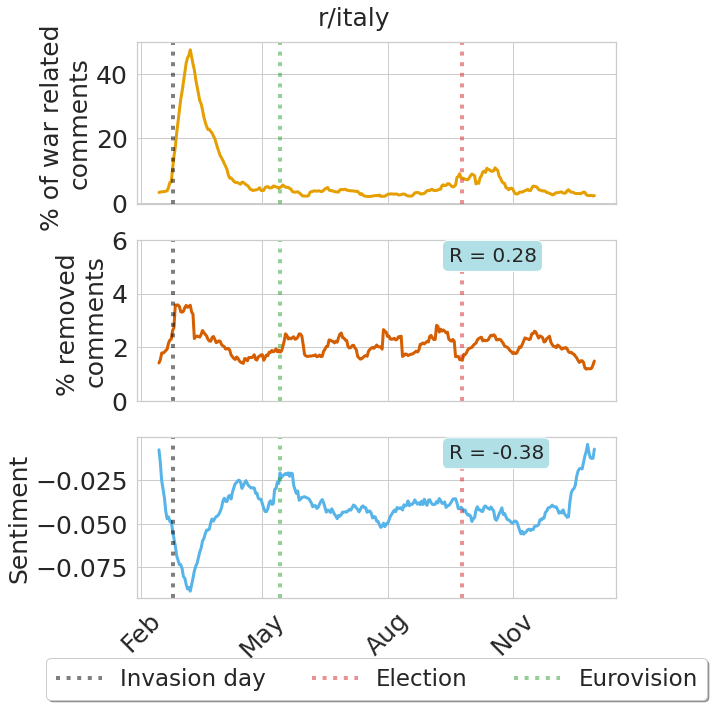

In [111]:
#split the plots of the time series

fig, axs = plt.subplots(3, 1, figsize=(10, 10),tight_layout=True,sharex = True)
axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)
axs[2].tick_params(axis='x', rotation=45)
axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)
axs[2].tick_params(axis='x', rotation=45)
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axs[2].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axs[1].set_ylim(0,6)
plt.rc('legend', fontsize=23) #fontsize of the legend


#first the percentage
axs[0].grid(True)
#pd.concat([grouped_all_sentiment['rolling_average_second'],grouped_all_sentiment['rolling_average']], axis=0)
#axs[0].plot(grouped_all_['percentage']*100,color='#E69F00',marker='o',markersize=2,linestyle = 'none',alpha=0.4)
sns.lineplot(data=(grouped_all_['percentage']*100).rolling(window=14).mean(),  color = '#E69F00',ci=95,err_style="band",linewidth=3,ax=axs[0])
axs[0].set_xlabel('')
axs[0].set_ylabel('% of war related \ncomments')

#then the sentiment
axs[2].grid(True)
#axs[2].plot(grouped_all_sentiment['sentiment'],color='#56B4E9',marker='o', markersize=2,linestyle = 'none',alpha=0.4)
sns.lineplot(data=(grouped_all_sentiment['sentiment']).rolling(window=14).mean(),  color = '#56B4E9',ci=95,err_style="band",linewidth=3,ax=axs[2]).annotate(text='R = -0.38',
                                                                                                                                                            xy=(0.65, 0.9), xycoords='axes fraction',ha='left', va='center',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'white'},fontsize = 20)
axs[2].set_ylabel('Sentiment')
axs[2].set_xlabel('')

#then the removed percentage
axs[1].grid(True)
#axs[1].plot(grouped_all_removed['percentage']*100,color='#D55E00',marker='o', markersize=2,linestyle = 'none',alpha=0.4)
sns.lineplot(data=(grouped_all_removed['percentage']*100).rolling(window=14).mean(),  color = '#D55E00',ci=95,err_style="band",linewidth=3,ax=axs[1]).annotate(text='R = 0.28',
                                                                                                                                                            xy=(0.65, 0.9), xycoords='axes fraction',ha='left', va='center',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'white'},fontsize = 20)
axs[1].set_ylabel('% removed \ncomments')
axs[1].set_xlabel('')

for i in range(3):
    axs[i].axvline(x = dt.datetime(2022, 2, 24), color = 'black', label="Invasion day",
                   linestyle = ":", linewidth = 4,alpha = 0.5)
    #axs[i].axvline(x = dt.datetime(2022, 4, 10), color = 'tab:red', linestyle = ":", linewidth = 4,alpha = 0.5)
    axs[i].axvline(x = dt.datetime(2022, 9, 25), color = 'tab:red', label = "Election", linestyle = ":", linewidth = 4,alpha = 0.5)
    axs[i].axvline(x = dt.datetime(2022, 5, 14), color = 'tab:green',label = "Eurovision", linestyle = ":", linewidth = 4,alpha = 0.5)

ax = axs[2]
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=3)


fig.suptitle('r/italy',fontsize=25)


### boxplots

In [47]:
posts_elections = pd.read_json('DATASETS/ITALY_ITALIA_ALL_ACTIVITY/POSTS/election_italy.json')
#now find the eurovision comments
posts_eurovision = posts_italy[posts_italy['title'].str.contains('Eurovision',case=False)]

In [48]:
#load toxicity values
toxicity_italiy = pd.read_json('DATASETS/ITALY_ITALIA_ALL_ACTIVITY/TOXICITY/italy_toxicity_0.json')
for i in tqdm(range(1,638, 1)):
    toxicity_italiy = pd.concat([toxicity_italiy,pd.read_json('DATASETS/ITALY_ITALIA_ALL_ACTIVITY/TOXICITY/italy_toxicity_'+str(i)+'.json')], ignore_index=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 637/637 [00:22<00:00, 28.55it/s]


In [49]:
#merge the values
comments_sentiment = pd.merge(left=comments_sentiment,right=toxicity_italiy,left_on='id',right_on='id',how='inner')

In [50]:
comments_sentiment.drop_duplicates(subset='id')

,id,body,author,created_utc_x,permalink,parent_id,banned_at_utc,link_id,comment_type,mod_reason_by,...,fear,joy,sadness,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
0,j2fvp7h,"io non li ho, ma spero che in ogni caso riusci...",rana-opaca,2022-12-31 23:45:26,/r/italy/comments/1006rza/buon_anno/j2fvp7h/,t3_1006rza,NaN,t3_1006rza,None,NaN,...,0.000190,0.999373,0.000305,0.0030,0.0054,0.0382,0.0059,0.0312,0.0035,0.0014
2,hv2cfyu,Idem.,Louis83,2022-02-01 00:00:06,/r/italy/comments/sgrpfg/caffè_italia_310122/h...,t1_hv2a8f4,NaN,t3_sgrpfg,None,NaN,...,0.035348,0.000562,0.948374,0.0007,0.0000,0.0002,0.0002,0.0004,0.0001,0.0000
3,hv2cohb,Tutto comodo quando inverti le conseguenze con...,mirh,2022-02-01 00:01:46,/r/italy/comments/sfqrds/la_prospettiva_russa/...,t1_huu2tvd,NaN,t3_sfqrds,None,NaN,...,0.000526,0.000061,0.000428,0.0004,0.0000,0.0002,0.0001,0.0002,0.0000,0.0000
4,hv2ct73,Consigli per il mal di gola da Omicron? Non ho...,Leto41,2022-02-01 00:02:42,/r/italy/comments/sgrpfg/caffè_italia_310122/h...,t3_sgrpfg,NaN,t3_sgrpfg,None,NaN,...,0.333027,0.332549,0.333771,0.0019,0.0002,0.0028,0.0002,0.0013,0.0003,0.0004
5,hv2ct7r,"La nato non è la cia, e la guerra fredda è fin...",mirh,2022-02-01 00:02:42,/r/italy/comments/sfqrds/la_prospettiva_russa/...,t1_huu8pzg,NaN,t3_sfqrds,None,NaN,...,0.001442,0.000507,0.490443,0.0038,0.0003,0.0030,0.0006,0.0037,0.0003,0.0019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088000,j2dez5z,"TLDR\n\n\nDai Paperinik, abbiamo capito che se...",shin987,2022-12-31 12:41:47,/r/italy/comments/zzkrzv/caffè_italia_311222/j...,t1_j2de8be,NaN,t3_zzkrzv,None,NaN,...,0.000747,0.000142,0.048645,0.3608,0.0020,0.0354,0.0025,0.1103,0.0035,0.0122
1088001,j2dez9r,date una medaglia a quest'utente\n\n(e un CD d...,TheFlagandAnthemGuy,2022-12-31 12:41:49,/r/italy/comments/zzqnhp/morto_joseph_ratzinge...,t1_j2d2vin,NaN,t3_zzqnhp,None,NaN,...,0.000215,0.999348,0.000266,0.0023,0.0106,0.0500,0.0095,0.0404,0.0067,0.0016
1088002,j2deze9,"Se sei fluente in tedesco, ho trovato con chi ...",technomau87,2022-12-31 12:41:51,/r/italy/comments/zzkrzv/caffè_italia_311222/j...,t1_j2deun8,NaN,t3_zzkrzv,None,NaN,...,0.009649,0.975468,0.002679,0.0030,0.0004,0.0067,0.0014,0.0062,0.0003,0.0002
1088003,j2df09k,chissa come fanno in germania a essere gratuit...,[deleted],2022-12-31 12:42:08,/r/italy/comments/zzkrzv/caffè_italia_311222/j...,t1_j2de13p,NaN,t3_zzkrzv,None,NaN,...,0.000176,0.000125,0.000347,0.0142,0.0002,0.0072,0.0013,0.0045,0.0002,0.0004


In [51]:
comments_sentiment['is_war_x'].value_counts()

is_war_x
False    998705
True      89300
Name: count, dtype: int64

In [52]:

comments_sentiment['link_id'] = comments_sentiment['link_id'].str.replace('t3_','')
comments_eurovision = comments_sentiment[comments_sentiment['link_id'].isin(posts_eurovision['id'])]
#filter by post - election
comments_election = comments_sentiment[comments_sentiment['link_id'].isin(posts_elections['id'])]

#get war related comments and non war related
comments_war = comments_sentiment[comments_sentiment['is_war_x'] == True]
comments_no_war = comments_sentiment[comments_sentiment['is_war_x'] == False]

In [53]:
comments_sentiment['is_war_x'].head()

0    False
1    False
2    False
3     True
4    False
Name: is_war_x, dtype: bool

In [62]:
comments_war = comments_war[~comments_war['id'].isin(comments_election['id'])]
comments_no_war = comments_no_war[~comments_no_war['id'].isin(comments_election['id'])]

comments_war = comments_war[~comments_war['id'].isin(comments_eurovision['id'])]
comments_no_war = comments_no_war[~comments_no_war['id'].isin(comments_eurovision['id'])]

In [63]:
#group by day and average the sentiment
comments_election = comments_election.groupby(pd.Grouper(key='created_utc_x',freq='D')).mean(numeric_only=True)
comments_eurovision = comments_eurovision.groupby(pd.Grouper(key='created_utc_x',freq='D')).mean(numeric_only=True)
comments_war = comments_war.groupby(pd.Grouper(key='created_utc_x',freq='D')).mean(numeric_only=True)
comments_no_war = comments_no_war.groupby(pd.Grouper(key='created_utc_x',freq='D')).mean(numeric_only=True)

#drop the nan values
comments_election = comments_election.dropna(subset='sentiment')
comments_eurovision = comments_eurovision.dropna(subset='sentiment')
comments_war = comments_war.dropna(subset='sentiment')
comments_no_war = comments_no_war.dropna(subset='sentiment')

data_fr = pd.DataFrame({'war':comments_war['sentiment'],'no_war':comments_no_war['sentiment'],'eurovision':comments_eurovision['sentiment'],'election':comments_election['sentiment']})
data_fr_tox = pd.DataFrame({'war':comments_war['toxicity'],'no_war':comments_no_war['toxicity'],'eurovision':comments_eurovision['toxicity'],'election':comments_election['toxicity']})

In [64]:
'''data_fr.to_json('DATASETS/PLOTS/box_plots_sentiment.json')
data_fr_tox.to_json('DATASETS/PLOTS/box_plots_toxicity.json')'''

"data_fr.to_json('DATASETS/PLOTS/box_plots_sentiment.json')\ndata_fr_tox.to_json('DATASETS/PLOTS/box_plots_toxicity.json')"

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items
def plot_boxs(df,sub,measure):
    sns.set(style= 'whitegrid',font_scale = 2)
    plt.figure(figsize=(8, 7)).tight_layout()
    #sns.set_theme(style="white")
    #we plot the different distributions of the sentences
    #set the title 
    plt.title(f'{measure} distribution r/{sub}')
    plt.ylabel(measure)

    sns.boxplot(data=df, palette="colorblind", showcaps=True,showmeans=True,meanprops={"marker":"X","markerfacecolor":"red","markersize":"14","markeredgecolor":'black'},showfliers=False,width=0.6)
    plt.xticks([0,1,2,3],['War','Other','Eurovision','Elections'])

    sns.set(style="whitegrid")

In [66]:
data_fr.head()

,war,no_war,eurovision,election
created_utc_x,,,,
2022-02-01,-0.142009,0.059849,-0.012211,NaN
2022-02-02,-0.094290,0.047866,-0.148359,NaN
2022-02-03,-0.137651,0.034392,-0.207263,NaN
2022-02-04,-0.123036,0.048102,NaN,NaN
2022-02-05,-0.101749,0.053407,0.348823,NaN


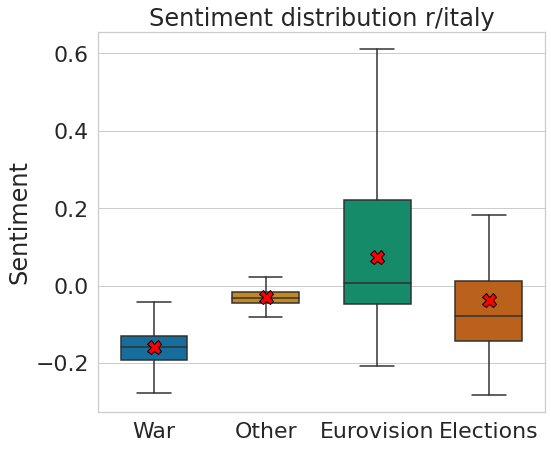

In [67]:
plot_boxs(data_fr,'italy','Sentiment')

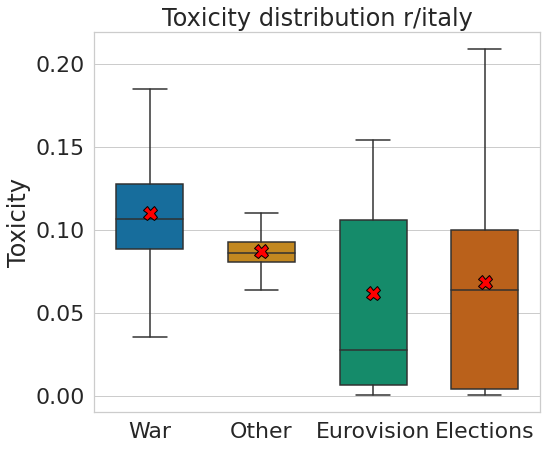

In [68]:
plot_boxs(data_fr_tox,'italy','Toxicity')

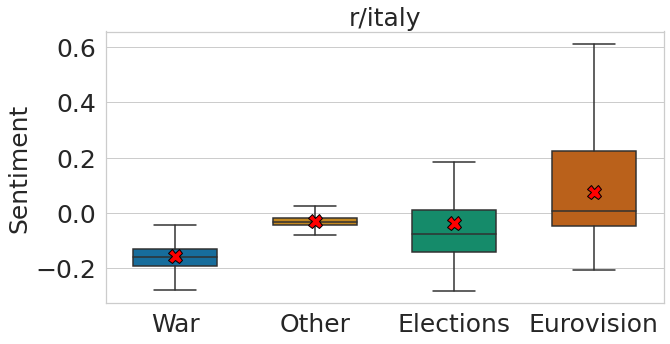

In [88]:
plt.rc('axes', labelsize=25) #fontsize of the x and y labels
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels
plt.rc('legend', fontsize=19) #fontsize of the legend

df = data_fr.reset_index()
df = pd.melt(df, id_vars='created_utc_x', value_vars=['war', 'no_war','eurovision','election'])
sub = "italy"
measure = "Sentiment"

plt.figure(figsize=(10, 5)).tight_layout()
#sns.set_theme(style="white")
#we plot the different distributions of the sentences
#set the title 
plt.title(f'r/{sub}',fontsize=25)

sns.boxplot(x="variable", y="value", order=["war", "no_war", "election", "eurovision"], data=df, palette="colorblind", showcaps=True,showmeans=True,
            meanprops={"marker":"X","markerfacecolor":"red","markersize":"14","markeredgecolor":'black'},
            showfliers=False,width=0.6)
plt.xticks([0,1,2,3],['War','Other','Elections', 'Eurovision'])
plt.xlabel("")
plt.ylabel(measure)


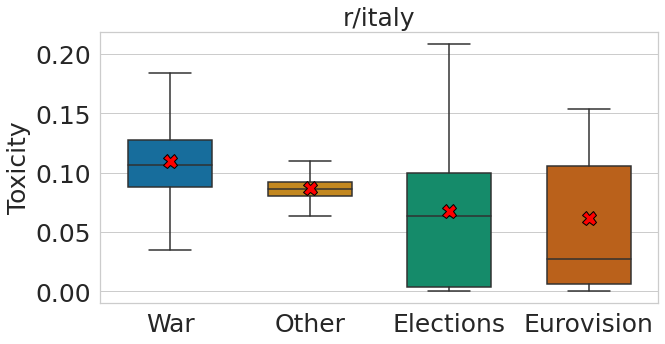

In [89]:
plt.rc('axes', labelsize=25) #fontsize of the x and y labels
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels
plt.rc('legend', fontsize=19) #fontsize of the legend


df = data_fr_tox.reset_index()
df = pd.melt(df, id_vars='created_utc_x', value_vars=['war', 'no_war','eurovision','election'])
sub = "italy"
measure = "Toxicity"

plt.figure(figsize=(10, 5)).tight_layout()
#sns.set_theme(style="white")
#we plot the different distributions of the sentences
#set the title 
plt.title(f'r/{sub}',fontsize=25)

sns.boxplot(x="variable", y="value", order=["war", "no_war", "election", "eurovision"], data=df, palette="colorblind", showcaps=True,showmeans=True,
            meanprops={"marker":"X","markerfacecolor":"red","markersize":"14","markeredgecolor":'black'},
            showfliers=False,width=0.6)
plt.xticks([0,1,2,3],['War','Other','Elections', 'Eurovision'])
plt.xlabel("")
plt.ylabel(measure)

In [71]:
df['variable'].unique

<bound method Series.unique of 0            war
1            war
2            war
3            war
4            war
          ...   
1331    election
1332    election
1333    election
1334    election
1335    election
Name: variable, Length: 1336, dtype: object>

In [72]:
df[df['variable']=='eurovision']['value'].median()

0.027227027027027027

In [73]:
print('hi')

hi


### networks

In [74]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import networkx as nx
from tqdm import tqdm

In [75]:
def annotate(r,p,g):
        g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                        xy=(0.05, 0.9), xycoords='axes fraction',
                        ha='left', va='center',
                        bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'},fontsize = 20)
from matplotlib.pyplot import xlim
import scipy.stats as stats
def plot_corr(data_f,score):
    plt.rc('axes', labelsize=20) #fontsize of the x and y labels
    plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=25) #fontsize of the y tick labels
    plt.rc('legend', fontsize=16) #fontsize of the legend
    r, p = stats.pearsonr(data_f[score], data_f["neigh_"+score])
    print(r,p)
    g = sns.jointplot(data=data_f, x=score, y="neigh_"+score)
    #g.legend(loc="upper left")
    #g.set_xlim(-1,1)
    #g.set_ylim(-1,1)
    #g.fig.suptitle("r/italy sentiment of the node vs sentiment of the neighborhood")
    g.plot_joint(sns.kdeplot,fill=True, cmap="rocket", thresh=0 ,levels=100,alpha=1)
    
    annotate(r,p,g)
    plt.xlabel('Node sentiment')
    plt.ylabel('Neighborhood sentiment')

In [76]:
#we then will insert this info in the network
#we do the same for italia
def calc_info(network,comments):
    missing_nodes = []
    for node in tqdm(network.nodes()):
        try:
            network.nodes[node]['sentiment'] = comments.loc[node]['sentiment']
        except:
            missing_nodes.append(node)
    network.remove_nodes_from(missing_nodes)
def calc_neigh_info(network):
    to_remove = []
    for node in tqdm(network.nodes()):
        #we get the out degree
        out_degree = network.out_degree(node)
        #we get the neighbors
        neighbors = list(network.neighbors(node))
        #we get the total size of the edges
        # total_size = sum([network.get_edge_data(node,neighbor)['Weight'] for neighbor in neighbors])
        if(len(neighbors) != 0):
            #we get the sentiment of the neighbors
            sentiment_neighbors = [network.nodes[neighbor]['sentiment'] for neighbor in neighbors]
            #we calculate the sentiment of the neighborhood
            neigh_sentiment = np.mean(sentiment_neighbors)
            #we add the attributes to the node
            network.nodes[node]['neigh_sentiment'] = neigh_sentiment
            network.nodes[node]['out_degree'] = out_degree
            network.nodes[node]['num_neighbours'] = len(neighbors)
            #nice 69!
        else:
            to_remove.append(node)
    network.remove_nodes_from(to_remove)

In [77]:
def calc_attributes(network,scores):
    missing_nodes = []
    for node in tqdm(network.nodes()):
        #we do the same for the scores    
        try:
            network.nodes[node]['age'] = scores[scores['author'] == node]['age'].values[0]
            network.nodes[node]['gender'] = scores[scores['author'] == node]['gender'].values[0]
            network.nodes[node]['partisan'] = scores[scores['author'] == node]['partisan'].values[0]
            network.nodes[node]['comments_outside'] = scores[scores['author'] == node]['count'].values[0]
            
        except:
            missing_nodes.append(node)
    print("Missing nodes: ",len(missing_nodes))
    network.remove_nodes_from(missing_nodes)

def calc_neighbourhood_scores(network,attribute):
    #attribute is to choose the name of the weight attribute on the edges
    to_remove = []
    for node in tqdm(network.nodes()):
        out_degree = network.out_degree(node)
        #we get the neighbors
        neighbors = list(network.neighbors(node))
        if(len(neighbors) != 0):
            #we get the age score of the neighbors
            age_neighbors = [network.nodes[neighbor]['age'] for neighbor in neighbors]
            #we get the gender score of the neighbors
            gender_neighbors = [network.nodes[neighbor]['gender'] for neighbor in neighbors]
            #we get the partisanship score of war comments of the neighbors
            partisan_neighbors = [network.nodes[neighbor]['partisan'] for neighbor in neighbors]
            #we perform the weighted average of the neighbour scores        
            weight_age_neighbors = [network.nodes[neighbor]['age']*network.get_edge_data(node,neighbor)['Weight'] for neighbor in neighbors]
            weight_gender_neighbors = [network.nodes[neighbor]['gender']*network.get_edge_data(node,neighbor)['Weight'] for neighbor in neighbors]
            weight_partisan_neighbors = [network.nodes[neighbor]['partisan']*network.get_edge_data(node,neighbor)['Weight'] for neighbor in neighbors]

            #we calculate the weighted average of the scores
            w_age_neighbors = np.sum(weight_age_neighbors)/sum([network.get_edge_data(node,neighbor)['Weight'] for neighbor in neighbors])
            w_gender_neighbors = np.sum(weight_gender_neighbors)/sum([network.get_edge_data(node,neighbor)['Weight'] for neighbor in neighbors])
            w_partisan_neighbors = np.sum(weight_partisan_neighbors)/sum([network.get_edge_data(node,neighbor)['Weight'] for neighbor in neighbors])
            age_neighbors = np.mean(age_neighbors)
            gender_neighbors = np.mean(gender_neighbors)
            partisan_neighbors = np.mean(partisan_neighbors)
            #we add the attributes to the node
            network.nodes[node]['neigh_age'] = w_age_neighbors
            network.nodes[node]['neigh_gender'] = w_gender_neighbors
            network.nodes[node]['neigh_partisan'] = w_partisan_neighbors
            '''
            network.nodes[node]['w_neigh_age'] = w_age_neighbors
            network.nodes[node]['w_neigh_gender'] = w_gender_neighbors
            network.nodes[node]['w_neigh_partisan'] = w_partisan_neighbors'''
            network.nodes[node]['out_degree'] = out_degree
            network.nodes[node]['num_neighbours'] = len(neighbors)
        else:
            to_remove.append(node)
    network.remove_nodes_from(to_remove)

In [78]:
def plot_for_scores(data,topic,xlimit):
    neigh_topic = "neigh_"+topic
           
    plt.rc('axes', labelsize=25) #fontsize of the x and y labels
    plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=25) #fontsize of the y tick labels
    plt.rc('legend', fontsize=20) #fontsize of the legend
    
    g=sns.jointplot(data=data, x=topic, y=neigh_topic,alpha=0.5,xlim=xlimit,ylim=xlimit).plot_joint(sns.kdeplot,fill=True, cmap="rocket", thresh=0 ,levels=50,alpha=1)
    #g.fig.suptitle("r/italia "+topic+" of the node vs "+topic+" of the neighborhood")
    r, p = stats.pearsonr(data[topic], data[neigh_topic])
    annotate(r,p,g) 
    plt.xlabel('Node '+topic)
    plt.ylabel('Neighborhood '+topic)   

In [79]:
from matplotlib import tight_layout
from matplotlib.pyplot import xlim
from sympy import true
from matplotlib.lines import Line2D

def plot_histograms(title,labels,custom_lines,*dfs):
    
    topics = ['sentiment','age','gender','partisan']
    colors= ['olive','darkred','darkorange','blue']
    fig, axs = plt.subplots(1, 4, figsize=(17, 4),sharey=True,tight_layout=True)
    i=0
    j=0
    xlimt = [-1,1]
    for topic in topics: 
        if(i>0):
            xlimt=[-0.5,0.5] 
        for df in dfs:      
            g= sns.kdeplot(data=df,x=topic,color=colors[j],ax=axs[i],fill=False)
            g.set_xlim(xlimt[0],xlimt[1])
            j+=1
        j=0
        i+=1
    plt.suptitle(title,fontsize=20)
    #fig.legend(custom_lines,labels, bbox_to_anchor=[1, 0],ncols=3)



/tmp/ipykernel_22181/2612494149.py:1: MatplotlibDeprecationWarning: The matplotlib.tight_layout module was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  from matplotlib import tight_layout


In [80]:
#import the network pregress
import networkx as nx
import pickle
G_italy = nx.DiGraph()
G_italy_war = nx.DiGraph()
with open('DATASETS/ITALY_ITALIA_ALL_ACTIVITY/INTERACTION_GRAPH/italy_all_interaction_with_sentiment_toxicity_percwar.gpickle', 'rb') as f:
    G_italy = pickle.load(f)
    f.close()

with open('DATASETS/ITALY_ITALIA_ALL_ACTIVITY/INTERACTION_GRAPH/italy_war_interaction_with_sentiment_toxicity.gpickle', 'rb') as f:
    G_italy_war = pickle.load(f)
    f.close()

In [81]:
#we import the social scores
#supposed to already have the sentiment loaded --> we need to average for each user.
scores_users= pd.read_csv('DATASETS/SOCIAL_SCORES/new_scores_users.csv')

In [82]:
user_war_sentiment = comments_sentiment[comments_sentiment['is_war_x'] == True].groupby(by=['author']).mean(numeric_only=True)
user_sentiment = comments_sentiment.groupby(by=['author']).mean(numeric_only=True)

In [83]:
user_war_sentiment['sentiment'].describe()

count    7713.000000
mean       -0.128132
std         0.248198
min        -0.973553
25%        -0.268615
50%        -0.147113
75%        -0.004722
max         0.987677
Name: sentiment, dtype: float64

In [84]:
G_italy.get_edge_data('--CamelCase','Cpe159')['size']

1

In [85]:
#cal info --> find sentiment of the node and of the neighbourhood
calc_info(G_italy,user_sentiment)
calc_info(G_italy_war,user_war_sentiment)
calc_neigh_info(G_italy)
calc_neigh_info(G_italy_war)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6005/6005 [00:00<00:00, 52122.62it/s]


In [86]:
for u, v, data in tqdm(G_italy.edges(data=True)):
    data["Weight"] = data.pop("size")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 649443/649443 [00:00<00:00, 1373005.23it/s]


In [90]:
calc_attributes(G_italy,scores_users)
calc_attributes(G_italy_war,scores_users)
calc_neighbourhood_scores(G_italy,'age')
calc_neighbourhood_scores(G_italy,'gender')
calc_neighbourhood_scores(G_italy,'partisan')
calc_neighbourhood_scores(G_italy_war,'age')
calc_neighbourhood_scores(G_italy_war,'gender')
calc_neighbourhood_scores(G_italy_war,'partisan')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28396/28396 [02:20<00:00, 202.42it/s]


Missing nodes:  12108


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5916/5916 [00:33<00:00, 178.80it/s]


Missing nodes:  1811


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3679/3679 [00:00<00:00, 10662.55it/s]


In [91]:
italy_war_scores  = pd.DataFrame.from_dict(dict(G_italy_war.nodes(data=True)), orient='index')
italy_all_scores = pd.DataFrame.from_dict(dict(G_italy.nodes(data=True)), orient='index')

In [92]:
italy_war_scores.columns

Index(['sentiment', 'toxicity', 'num_of_comments', 'neigh_sentiment',
       'neigh_toxicity', 'weight_toxicity_neighbors',
       'weight_sentiment_neighbors', 'out_degree', 'num_neighbours', 'age',
       'gender', 'partisan', 'comments_outside', 'neigh_age', 'neigh_gender',
       'neigh_partisan'],
      dtype='object')

In [93]:
#drop useless columns
italy_war_scores = italy_war_scores.drop(columns=['toxicity','neigh_toxicity','weight_toxicity_neighbors','weight_sentiment_neighbors','out_degree'],axis=1)
italy_all_scores = italy_all_scores.drop(columns=['toxicity','neigh_toxicity','perc_war_comments','neigh_perc_war_comments','weight_toxicity_neighbors','out_degree','weight_perc_war_comments_neighbors'],axis=1)

In [94]:
#only for vis purposes
italy_war_scores.loc['test1'] = [-1,1,-1,1,-0.3,-0.3,-0.3,1,-0.3,-0.3,-0.3]
italy_war_scores.loc['test2'] = [-1,1,1,1,-0.3,-0.3,-0.3,1,0.3,0.3,0.3]
italy_war_scores.loc['test3'] = [1,1,-1,1,0.3,0.3,0.3,1,-0.3,-0.3,-0.3]
italy_war_scores.loc['test4'] = [1,1,1,1,0.3,0.3,0.3,1,0.3,0.3,0.3]
italy_all_scores.loc['test1'] = [-1,1,-1,1,-0.3,-0.3,-0.3,1,-0.3,-0.3,-0.3]
italy_all_scores.loc['test2'] = [-1,1,1,1,-0.3,-0.3,-0.3,1,0.3,0.3,0.3]
italy_all_scores.loc['test3'] = [1,1,-1,1,0.3,0.3,0.3,1,-0.3,-0.3,-0.3]
italy_all_scores.loc['test4'] = [1,1,1,1,0.3,0.3,0.3,1,0.3,0.3,0.3]

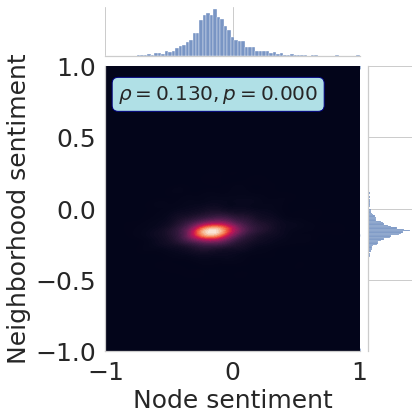

In [95]:
plot_for_scores(italy_war_scores,'sentiment',[-1,1])

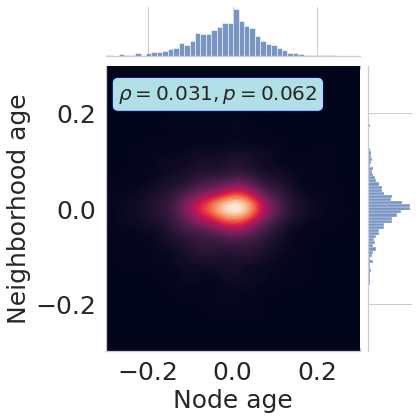

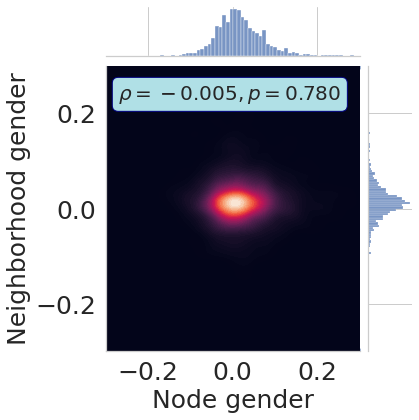

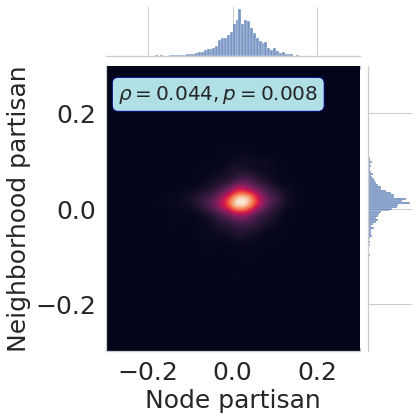

In [96]:
plot_for_scores(italy_war_scores,'age',[-.3,.3])
plot_for_scores(italy_war_scores,'gender',[-.3,.3])
plot_for_scores(italy_war_scores,'partisan',[-.3,.3])

In [97]:

count_war = comments_sentiment[['author','is_war_x']].groupby(by='author').sum(numeric_only=True)
user_total_scores_upd = pd.merge(right=italy_all_scores,left=count_war,how='inner',left_on= 'author', right_index=True)

In [98]:
user_total_scores_upd.describe()

,is_war_x,sentiment,num_of_comments,neigh_sentiment,num_neighbours,age,gender,partisan,comments_outside,neigh_age,neigh_gender,neigh_partisan
count,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000
mean,4.388530,-0.003509,57.511228,-0.028226,22.278607,-0.025660,0.025884,0.019270,60.686769,-0.008620,0.021460,0.013119
std,25.002233,0.227776,270.993497,0.100098,70.771698,0.100108,0.070114,0.050281,231.943910,0.056392,0.044006,0.031731
min,0.000000,-0.973553,1.000000,-0.793040,1.000000,-0.615724,-0.273994,-0.262155,1.000000,-0.615724,-0.209717,-0.179477
25%,0.000000,-0.129459,2.000000,-0.072032,1.000000,-0.079399,-0.017514,-0.008957,3.000000,-0.029788,0.002104,0.000366
50%,0.000000,-0.026123,6.000000,-0.040085,3.000000,-0.015899,0.017813,0.020792,11.000000,-0.004073,0.018852,0.013277
75%,1.000000,0.100306,24.000000,-0.004257,12.000000,0.034924,0.062146,0.050628,43.000000,0.015917,0.038417,0.026318
max,1022.000000,0.978441,11323.000000,0.978247,1712.000000,0.377291,0.484049,0.327886,11500.000000,0.377291,0.475321,0.327886


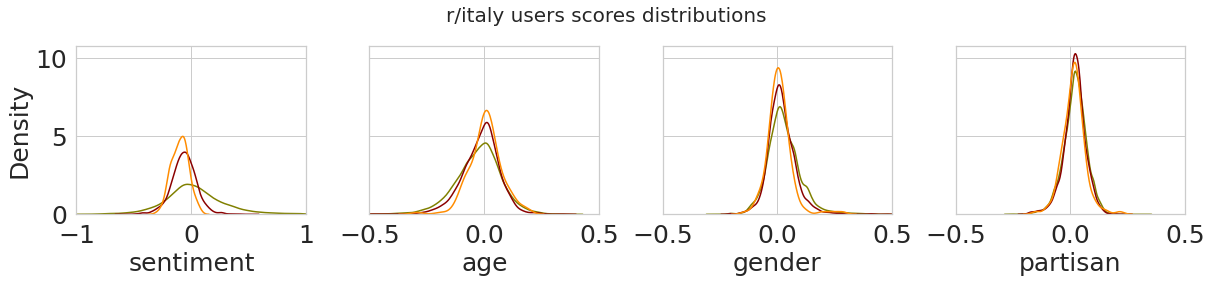

In [99]:
#plot_histograms(user_total_scores_upd,user_total_scores_war_upd,'France users scores distributions')
plt.rc('axes', labelsize=25) #fontsize of the x and y labels
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels
plt.rc('legend', fontsize=19) #fontsize of the legend
custom_line = [Line2D([0], [0], color='olive', lw=4), Line2D([0], [0], color='darkred', lw=4), Line2D([0], [0], color='darkorange', lw=4)]

plot_histograms('r/italy users scores distributions',['No war comments','Between 1 and 100 war comments',' More than 100 war comments'],custom_line,user_total_scores_upd[user_total_scores_upd['is_war_x']<1],user_total_scores_upd[(user_total_scores_upd['is_war_x']>1) & (user_total_scores_upd['is_war_x']<100)],user_total_scores_upd[user_total_scores_upd['is_war_x']>100])


In [100]:
from scipy import stats
print(stats.kruskal(user_total_scores_upd[user_total_scores_upd['is_war_x']<1]['sentiment'],user_total_scores_upd[user_total_scores_upd['is_war_x']>1]['sentiment']))
print(stats.kruskal(user_total_scores_upd[user_total_scores_upd['is_war_x']>1]['sentiment'],user_total_scores_upd[user_total_scores_upd['is_war_x']>100]['sentiment']))
print(stats.kruskal(user_total_scores_upd[user_total_scores_upd['is_war_x']<1]['sentiment'],user_total_scores_upd[user_total_scores_upd['is_war_x']>100]['sentiment']))

KruskalResult(statistic=459.91457223912107, pvalue=5.017435822018844e-102)
KruskalResult(statistic=17.847957708372245, pvalue=2.3927593305334234e-05)
KruskalResult(statistic=54.734077984624705, pvalue=1.3799264257837648e-13)


In [101]:
print(user_total_scores_upd[user_total_scores_upd['is_war_x']<1].median())
print(user_total_scores_upd[(user_total_scores_upd['is_war_x']>1) & (user_total_scores_upd['is_war_x']<100)].median())
print(user_total_scores_upd[user_total_scores_upd['is_war_x']>100].median())

is_war_x            0.000000
sentiment           0.004965
num_of_comments     3.000000
neigh_sentiment    -0.031830
num_neighbours      2.000000
age                -0.019516
gender              0.020433
partisan            0.021332
comments_outside    9.000000
neigh_age          -0.004117
neigh_gender        0.018714
neigh_partisan      0.013487
dtype: float64
is_war_x             5.000000
sentiment           -0.062903
num_of_comments     59.000000
neigh_sentiment     -0.051007
num_neighbours      30.000000
age                 -0.007353
gender               0.012280
partisan             0.019781
comments_outside    21.000000
neigh_age           -0.003979
neigh_gender         0.019082
neigh_partisan       0.013241
dtype: float64
is_war_x             177.000000
sentiment             -0.099580
num_of_comments     1019.000000
neigh_sentiment       -0.062458
num_neighbours       386.500000
age                    0.006172
gender                 0.004752
partisan               0.016538
commen

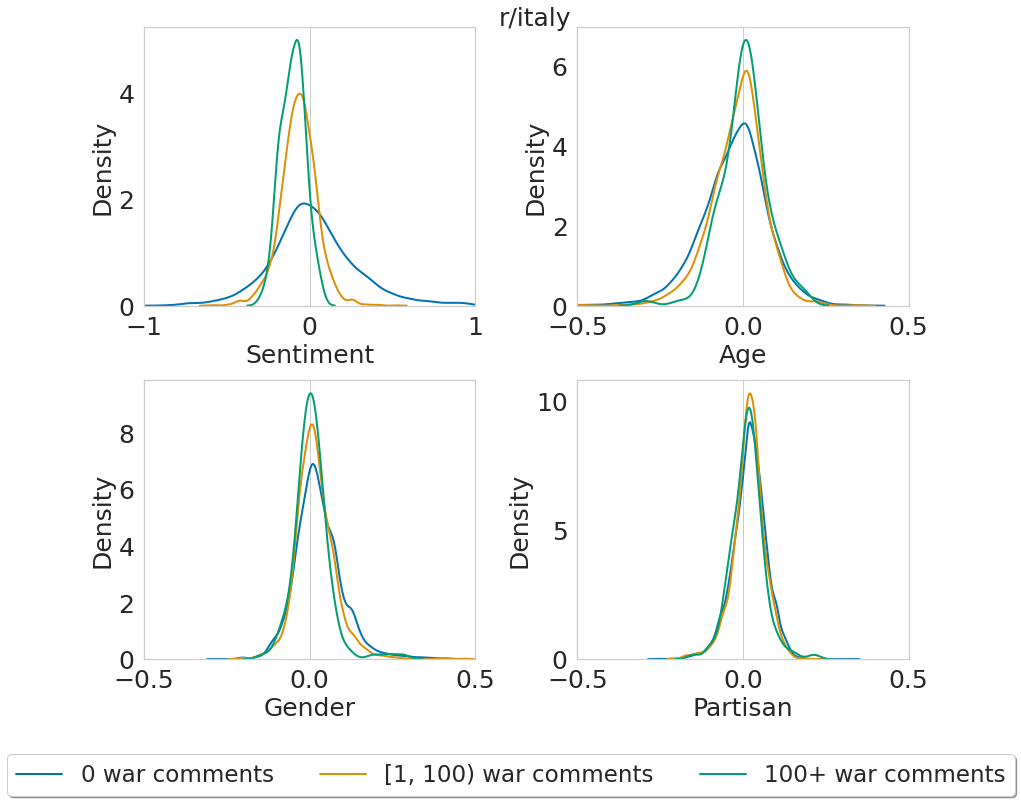

In [110]:
dfs = [user_total_scores_upd[user_total_scores_upd['is_war_x']<1],user_total_scores_upd[(user_total_scores_upd['is_war_x']>1) & (user_total_scores_upd['is_war_x']<100)],user_total_scores_upd[user_total_scores_upd['is_war_x']>100]]

labels = ['0 war comments','[1, 100) war comments','100+ war comments']
topics = ['sentiment','age','gender','partisan']
colors= sns.color_palette("colorblind", 3)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
plt.rc('legend', fontsize=23) #fontsize of the legend
i=0
j=0
for topic in topics: 
    if j == 2:
        i = 1
        j = 0
    if topic != 'sentiment': 
        xlimt=[-0.5,0.5]
    else:
        xlimt = [-1, 1]
    ax = axs[i][j]
    ax.yaxis.get_major_locator().set_params(integer=True)
    c = 0
    for df in dfs:      
        sns.kdeplot(data=df, x=topic, color=colors[c],ax=ax,fill=False,
                    label = labels[c],linewidth=2)
        c += 1
    ax.set_xlim(xlimt[0],xlimt[1])
    ax.set_xticks([xlimt[0],(xlimt[0]+xlimt[1])/2,xlimt[1]])
    ax.set_xlabel(topic.capitalize())
    j += 1
    ax.yaxis.grid(False)
plt.tight_layout()
#plt.suptitle(title,fontsize=20)
box = ax.get_position()
#ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                 box.width, box.height * 0.9])

plt.suptitle("r/italy",y=1.01,x=0.53,fontsize=25)
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(-0.2, -0.3),
          fancybox=True, shadow=True, ncol=3)
# plt.tight_layout()
#fig.legend(custom_lines,labels, bbox_to_anchor=[0.96, 0],ncols=3)